In [181]:
import numpy as np

In [182]:
class LinearRegression:
    """
    Univariate implementation of the Linear Regression model
    using the Mean Squared Error loss function and gradient descent
    """

    def __init__(self, w: float = 1.0, b: float = 0.0):
        self.w = w
        self.b = b

    def predict(self, x_predict: np.ndarray) -> np.ndarray:
        return self.w * x_predict + self.b

    @staticmethod
    def mean_squared_error(y_pred: np.ndarray, y_actual: np.ndarray) -> float:
        return np.mean((y_pred - y_actual) ** 2) / 2

    @staticmethod
    def compute_w_gradient(x_train: np.ndarray, errors: np.ndarray) -> float:
        """
        Computes the gradient for the parameter w.
        It's computed from the partial derivative of the MSE loss function J
        with respect to w
        """
        return np.mean(errors * x_train)

    @staticmethod
    def compute_b_gradient(errors: np.ndarray) -> float:
        """
        Computes the gradient for the parameter b.
        It's computed from the partial derivative of the MSE loss function J
        with respect to b
        """
        return np.mean(errors)

    def fit(self, x_train: np.ndarray, y_train: np.ndarray, learning_rate: float = 0.01, epochs: int = 10):
        m = len(x_train)
        for epoch in range(epochs):
            y_pred = self.predict(x_train)
            errors = y_pred - y_train
            self.w -= learning_rate * self.compute_w_gradient(x_train, errors)
            self.b -= learning_rate * self.compute_b_gradient(errors)

In [183]:
np.random.seed(42) # this is purely for replication

# on X-coordinates 0-10, create 20 data points
x_train = np.linspace(0, 10, 20)
y_train = 2 * x_train + 7 + np.random.normal(0, 1, 20)  # y = 2x + 7 + noise

m = len(x_train)
x_test = np.linspace(0, 15, 100)

model = LinearRegression()
model.fit(x_train, y_train, epochs=1500)

y_pred = model.predict(x_test)

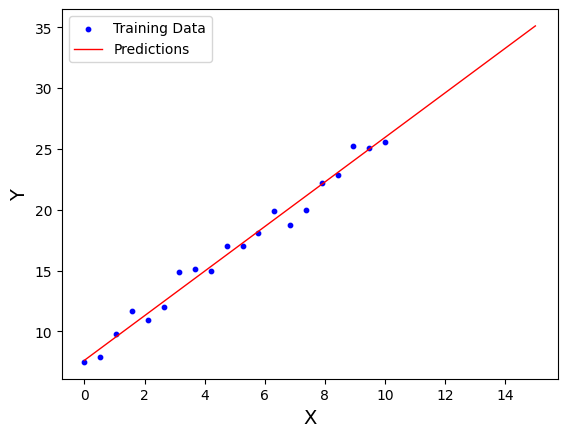

In [184]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color='blue', label='Training Data', s=10)
plt.plot(x_test, y_pred, color='red', label='Predictions', linewidth=1)

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.legend(fontsize=10)